# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».  
Чтобы скорректировать рекламный бюджет, нужно понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**

**Тариф «Смарт»**

  - Ежемесячная плата: 550 рублей
  - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
  - Стоимость услуг сверх тарифного пакета:
     
        - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх.  
          Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
        - Сообщение — 3 рубля.
        - 1 Гб интернет-трафика — 200 рублей.

**Тариф «Ультра»**

  - Ежемесячная плата: 1950 рублей
  - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
  - Стоимость услуг сверх тарифного пакета:
     
        - Минута разговора — 1 рубль;
        - Сообщение — 1 рубль;
        - 1 Гб интернет-трафика: 150 рублей.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Таблица-calls" data-toc-modified-id="Таблица-calls-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица calls</a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица internet</a></span></li><li><span><a href="#Таблица-messages" data-toc-modified-id="Таблица-messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица messages</a></span></li><li><span><a href="#Таблица-tariffs" data-toc-modified-id="Таблица-tariffs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица tariffs</a></span></li><li><span><a href="#Таблица-users" data-toc-modified-id="Таблица-users-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Таблица users</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных-и-подсчёт-выручки" data-toc-modified-id="Анализ-данных-и-подсчёт-выручки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных и подсчёт выручки</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Изучение общей информации

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

from IPython.display import display

# игнорируем варнинги
import warnings
warnings.filterwarnings('ignore')

### Таблица calls

In [2]:
# Откроем csv-файл "calls" и сохраним датафрейм в переменную calls

calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv', sep=',')

In [3]:
# Выведем первые 5 строк датафрейма

calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# выведем основную информацию для датафрейма calls

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Всего 4 колонки, 202607 строк. Из них 1 столбец типа float64, который сможем округлить и перевести в int, так как «Мегалайн» всегда округляет вверх значения минут. Также есть 2 столбца типа object и 1 столбец типа int64.  
Столбец "call_date" можно перевести в тип "datetime".  
Все столбцы без пропусков.

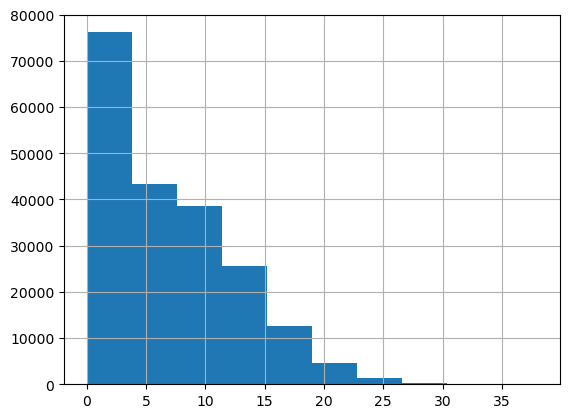

In [5]:
# выведем гистограмму для столбца с продолжительностью звонков

calls.duration.hist();

Видим довольно большое количество звонков с количеством минут разговора = 0. Вероятно, это звонки, которые были не приняты/сброшены. Такие данные имеют место быть в датасете, так как с их учетом мы сможем получить информацию об общем числе звонков и нагрузке на сеть компании.

### Таблица internet


In [6]:
# Откроем csv-файл "internet" и сохраним датафрейм в переменную sessions

sessions = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')

In [7]:
# Выведем первые 5 строк датафрейма sessions.

sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
# выведем основную информацию для датафрейма sessions

sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Видим, что в таблице 5 столбцов, из них 1 столбец типа float64, который сможем округлить и перевести в int, так как «Мегалайн» всегда округляет вверх значения мегабайт. Также есть 2 столбца типа int64, из них Unnamed: 0 - ошибочный, который можно удалить, и 2 столбца типа object.  
Столбец "session_date" можно перевести в тип "datetime".  
Все столбцы без пропусков.

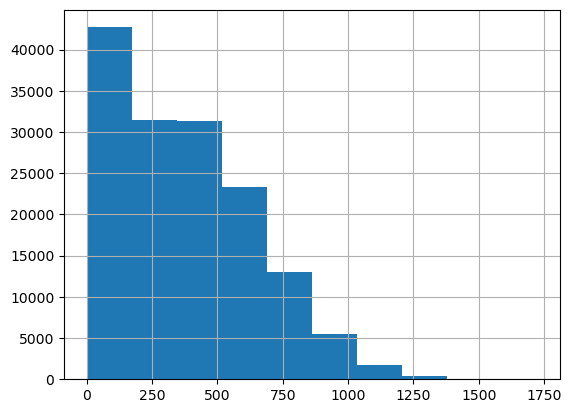

In [9]:
# Выведем гистограмму для столбца с количеством потраченных мегабайт

sessions.mb_used.hist();

Значение трафика 0 Мб - вероятно отклоненные соединения (возможно, из-за плохого качества соединения). Их можно удалить, так как никаких важных сведений они нам не дают.

### Таблица messages


In [10]:
# Откроем csv-файл "messages" и сохраним датафрейм в переменную messages

messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')

In [11]:
# Выведем первые 5 строк датафрейма messages

messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
# Выведем основную информацию для датафрейма messages

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В данном датасете 3 столбца: один имеет тип int, два других - тип object.

Столбец "message_date" можно перевести в тип "datetime".  
Все столбцы без пропусков.


### Таблица tariffs


In [13]:
# Откроем csv-файл "tariffs" и сохраним датафрейм в переменную tariffs.

tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

In [14]:
# Выведем весь датафрейм tariffs

tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
# Выведем основную информацию для датафрейма tariffs

tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Датасет состоит из 2 строк и 8 столбцов (7 типа int64 и 1 типа object). Каждая содержит информацию о тарифе.

### Таблица users


In [16]:
# Откроем csv-файл "users" и сохраним датафрейм в переменную users.

users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [17]:
# Выведем первые 5 строк датафрейма users

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
# Выведем основную информацию для датафрейма users

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Датасет состоит из 500 строк и 8 столбцов (2 типа int64 и 6 типа object). Столбцы churn_date и reg_date можно перевести в тип "datetime".

Видим пропуски в churn_date (дата прекращения пользования тарифом). Это значит, что люди продолжают пользоваться тарифом.  
C пропусками в этой колонке делать ничего не будем.

**Вывод:**

В качестве входных данных имеем 5 датасетов с выборкой по 500 пользователям и их активности (телефонной, интернет, смс), а также информацию о тарифах, к которым они подключены. В результате предварительного анализа можем сделать вывод:

- в датасете internet присутствует ошибочный столбец
- 5 столбцов нужно перевести в datetime (reg_date, churn_date, message_date, session_date, call_date)
- 2 столбца (mb_used, duration) нужно округлить вверх и перевести в int
- столбец с нулевыми значениями duration (Нулевые значения минут не влияют на расходы пользователя, но нам необходимо знать количество совершенных звонков, даже нулевых, чтобы понимать нагрузку на сеть) 
- пропуски в churn_date (дата прекращения пользования тарифом). Означают, что люди продолжают пользоваться тарифом. 
- для всех датасетов, кроме tariffs, у нас есть общий столбец user_id, по которому мы сможем их объединить.

## Подготовка данных

Приведём столбцы

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`.

In [19]:
# обработка столбца reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# обработка столбца churn_date
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# обработка столбца call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# обработка столбца message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# обработка столбца session_date
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

В столбцах `duration` и `mb_used` датафреймов `calls` и `sessions` соответственно, значения дробные. Округлим значения  вверх, как это делает компания Мегалайн, и приведём столбцы к типу `int`.

In [20]:
calls.duration = np.ceil(calls.duration).astype(int)
sessions.mb_used = np.ceil(sessions.mb_used).astype(int)

Удалим столбец `Unnamed: 0` из датафрейма `sessions`. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (`df.to_csv(..., index=column)`). Он сейчас не понадобится.

In [21]:
del sessions['Unnamed: 0']

Создадим столбец `month` в датафрейме `calls` с номером месяца из столбца `call_date`.

In [22]:
calls['month'] = calls['call_date'].dt.month

Создадим столбец `month` в датафрейме `messages` с номером месяца из столбца `message_date`.

In [23]:
messages['month'] = messages['message_date'].dt.month

Создадим столбец `month` в датафрейме `sessions` с номером месяца из столбца `session_date`.

In [24]:
sessions['month'] = sessions['session_date'].dt.month

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам.

In [25]:
calls_per_month = calls.groupby(['user_id','month']).agg(calls=('duration','count'))

In [26]:
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраним в переменную `minutes_per_month`.

In [27]:
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration', 'sum'))

In [28]:
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраним в переменную `messages_per_month`.

In [29]:
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date', 'count'))

In [30]:
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраним в переменную `sessions_per_month`.

In [31]:
sessions_per_month = sessions.groupby(['user_id','month']).agg({'mb_used': 'sum'})

In [32]:
sessions_per_month.head(30)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053
1002    6        10871
        7        17601
        8        20347
        9        16712
        10       13905
        11       18610
        12       18137
1003    8         8571
        9        12479
        10       14779
        11       11368
        12       10132
1004    5        13415
        6        17619
        7        22243
        8        28607
        9        15125
        10       18494
        11       15631
        12       18038

**Вывод:**

На этапе предобработки были выполнены следующие действия:

- привели пять столбцов с датами из типа object к типу datetime с помощью метода to_datetime
- округлили минуты и мегабайты в большую сторону до целочисленных значений, как это делает компания "Мегалайн"
- удалили ошибочный столбец из датасета sessions
- добавили колонки с номером месяца в трёх датафреймах для удобства группировки данных в дальнейшем.
- подсчитали количество сделанных звонков разговора для каждого пользователя по месяцам.
- подсчитали количество израсходованных минут разговора для каждого пользователя по месяцам.
- подсчитали количество отправленных сообщений по месяцам для каждого пользователя.
- подсчитали количество потраченных мегабайт по месяцам для каждого пользователя

## Анализ данных и подсчёт выручки

Посмотрим какой % клиентов расторгли договор:

In [33]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Объединяем все посчитанные выше значения в один датафрейм user_behavior. Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [34]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2256.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23257.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14016.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14070.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14581.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [35]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных:

In [36]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [37]:
# переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

Присоединяем информацию о тарифах

In [38]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [39]:
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2256.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23257.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14016.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14070.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14581.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф

In [40]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [41]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [42]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбец `total_cost`

In [43]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [44]:
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2256.0,159.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23257.0,172.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
2,1000,7,47.0,75.0,14016.0,340.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
3,1000,8,52.0,81.0,14070.0,408.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
4,1000,9,58.0,57.0,14581.0,466.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0


Подсчитаем основные статистики для пользователей разных тарифов и сравним поведение пользователей - их расходы на разные виды связи.

In [45]:
users_ultra = user_behavior[user_behavior['tariff'] == 'ultra'].groupby('user_id').mean()
users_ultra[['calls','messages','mb_used','minutes','messages_included','mb_per_month_included','minutes_included','rub_monthly_fee','total_cost']].describe()

,calls,messages,mb_used,minutes,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,total_cost
count,148.000000,148.000000,148.000000,148.000000,148.0,148.0,148.0,148.0,148.000000
mean,73.438101,54.030743,19592.839001,527.821819,1000.0,30720.0,3000.0,1950.0,2087.417442
std,39.233625,46.366246,8318.753942,281.786359,0.0,0.0,0.0,0.0,300.847452
min,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,1950.0,1950.000000
25%,44.750000,17.000000,14504.429545,325.437500,1000.0,30720.0,3000.0,1950.0,1950.000000
50%,72.000000,45.500000,18715.550000,514.541667,1000.0,30720.0,3000.0,1950.0,1950.000000
75%,102.055556,84.250000,25906.544643,746.972222,1000.0,30720.0,3000.0,1950.0,1990.625000
max,170.000000,192.000000,38502.000000,1179.363636,1000.0,30720.0,3000.0,1950.0,3262.500000


In [46]:
# доля пользователей тарифа ultra со средним платежом в месяц большим, чем абонентская плата

print('{:.2%}'.format(len(users_ultra.query('total_cost > 1950')) / len(users_ultra)))

29.05%


В среднем пользователи "Ультра" совершают 73 звонка в месяц общей длительностью 528 минут, отправляют 54 смс и используют чуть больше 19 Гб трафика. При этом получается, что всем пользователям хватает месячного пакета звонков и смс, и только по трафику есть превышение лимита. Поэтому средняя сумма потраченных пользователем за месяц денег выше абонентской платы и составляет 2087 руб.

In [47]:
users_smart = user_behavior[user_behavior['tariff'] == 'smart'].groupby('user_id').mean()
users_smart[['calls','messages','mb_used','minutes','messages_included','mb_per_month_included','minutes_included','rub_monthly_fee','total_cost']].describe()

,calls,messages,mb_used,minutes,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,total_cost
count,350.000000,350.000000,350.000000,350.000000,350.0,350.0,350.0,350.0,350.000000
mean,58.652045,32.352078,16201.387920,419.634803,50.0,15360.0,500.0,550.0,1329.726499
std,20.091360,26.512448,3583.640810,145.031543,0.0,0.0,0.0,0.0,606.851951
min,0.000000,0.000000,5391.181818,0.000000,50.0,15360.0,500.0,550.0,550.000000
25%,43.375000,11.000000,13934.035714,316.886364,50.0,15360.0,500.0,550.0,878.541667
50%,60.000000,27.750000,16272.357143,425.062500,50.0,15360.0,500.0,550.0,1183.100000
75%,72.000000,48.000000,18620.263889,519.508333,50.0,15360.0,500.0,550.0,1682.694444
max,121.000000,118.000000,27321.000000,891.500000,50.0,15360.0,500.0,550.0,4333.333333


In [48]:
# доля пользователей тарифа smart со средним платежом в месяц большим, чем абонентская плата

print('{:.2%}'.format(len(users_smart.query('total_cost > 550')) / len(users_smart)))

95.14%


In [49]:
# доля месяце-пользователей с платежом большим, чем абонентская плата

print('{:.2%}'.format(len(user_behavior.query('total_cost > 550 and tariff == "smart"')) / len(user_behavior.query('tariff == "smart"'))))

74.70%


В среднем пользователи "Смарт" совершают 59 звонков в месяц общей длительностью 420 минут, отправляют 33 смс и используют около 16 Гб трафика. При этом получается, что чуть больше, чем половине пользователей хватает месячного пакета звонков, почти всем хватает смс, а трафик выходит за пределы лимитов у более чем половины пользователей. Это видно и по среднему количеству потраченных пользователем за месяц денег - менее 5% пользователей вносят только абонентскую плату и ничего сверх нее, но не каждый месяц все пользователи переплачивают - если брать не сгруппированные данные, то всего 75% записей о тратах выходят за пределы абонентской платы.

Датафрейм `stats_df` для каждой пары "месяц-тариф" будет хранить основные характеристики

In [50]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8524.44,18.24,203.85,20.81,6451.84,16.20,154.23,20.5,7107.0,15.0,162.5
1,1,ultra,59.44,13153.56,33.78,428.11,41.64,6872.15,30.67,269.76,51.0,14808.0,32.0,382.0
2,2,smart,40.19,11611.40,24.09,298.69,25.39,6254.55,21.75,190.82,38.5,12572.5,20.0,258.0
3,2,ultra,41.54,11786.96,21.96,297.12,40.97,10654.34,26.77,296.51,25.0,7335.5,5.5,168.0
4,3,smart,54.32,15123.86,31.86,390.05,25.54,5835.46,26.80,191.89,59.0,15690.0,23.0,409.0
5,3,ultra,67.68,17551.97,32.30,489.65,44.84,10961.94,41.62,333.74,57.0,17513.0,20.0,403.0
6,4,smart,51.31,13479.48,30.74,367.13,25.70,5705.03,24.54,186.49,52.0,14104.5,28.0,368.5
7,4,ultra,64.09,16843.80,31.56,458.02,36.27,9727.48,37.51,267.68,61.0,16662.0,17.0,453.0
8,5,smart,55.24,15825.20,33.77,387.36,25.38,5985.18,27.04,186.60,59.0,16343.0,30.0,433.0
9,5,ultra,72.51,19381.19,37.85,510.33,41.08,10055.63,40.31,289.60,75.0,18717.0,25.0,519.0


Посмотрим на распределение среднего количества звонков по видам тарифов и месяцам:

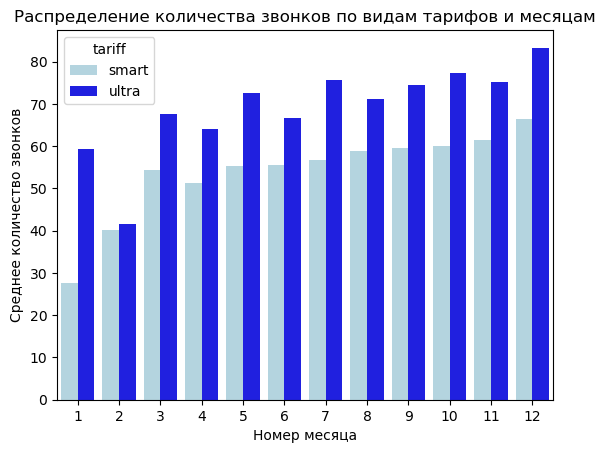

In [51]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

Среднее количество звонков на тарифе `ultra` больше, чем на тарифе `smart`, причём на обоих тарифах оно увеличивалось в течение года и достигло своего максимума в декабре.

Посмотрим на гистограмму распределения количества звонков на клиента в зависмости от тарифа:

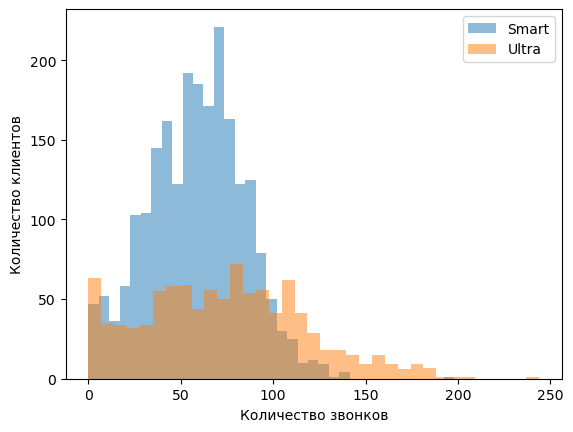

In [52]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Основная масса клиентов тарифа Smart делает от 20 до 90 звонков в месяц и небольшая доля клиентов- до 130-140 звонков.  
Основная масса клиентов тарифа Ultra делает до 120 звонков в месяц и небольшая доля клиентов- до 200 звонков.  

Распределение средней продолжительности звонков по видам тарифов и месяцам:

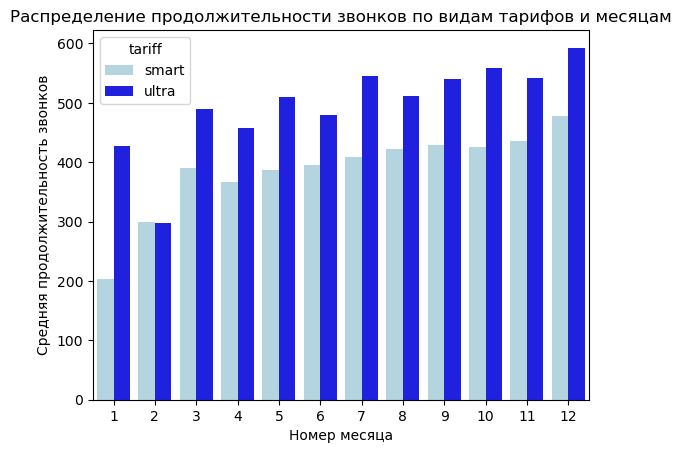

In [53]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

Средняя продолжительность звонков на тарифе ultra больше, чем на тарифе smart, причём на обоих тарифах она увеличивалась в течение года и достигла своего максимума в декабре.  
Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Построим гистограммы распределения продолжительности телефонных разговоров клиентов в зависимости от тарифа:

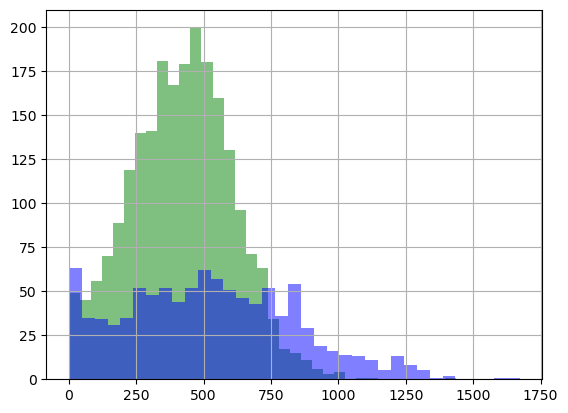

In [54]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

Общая длительность звонков пользователей "Ультра" не добирается и до половины пакета. Основная масса клиентов тарифа Ultra разговаривает до 850 мин в месяц и небольшая доля клиентов- до 1400 мин.  
Общая длительность звонков пользователей "Смарт" может и в полтора раза превысить объем, включенный в пакет. Основная масса клиентов тарифа Smart разговаривает 150-650 мин в месяц и небольшая доля клиентов- до 1000 мин. Пакета хватает примерно 55% пользователей. Средняя общая длительность и отклонение больше у тарифа "Ультра".

Распределение среднего количества сообщений по видам тарифов и месяцам:

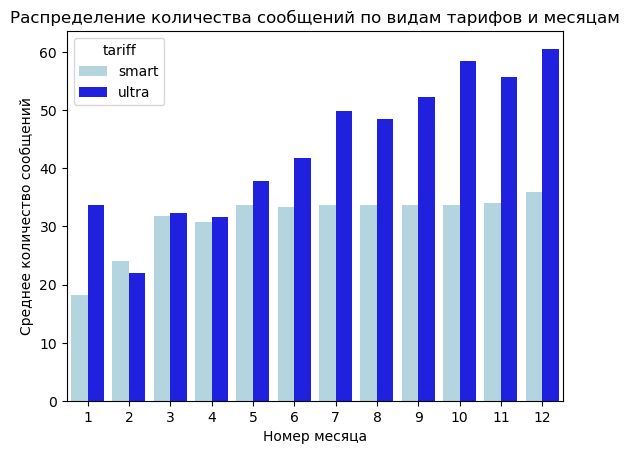

In [55]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

Среднее количество сообщений на тарифе Ultra больше, чем на тарифе Smart, причём на тарифе Ultra виден рост количества сообщений в течение года, а на тарифе Smart рост наблюдался только в первые три месяца и потом активного уже не было.

Построим гистограммы распределения количества сообщений клиентов в зависимости от тарифа:

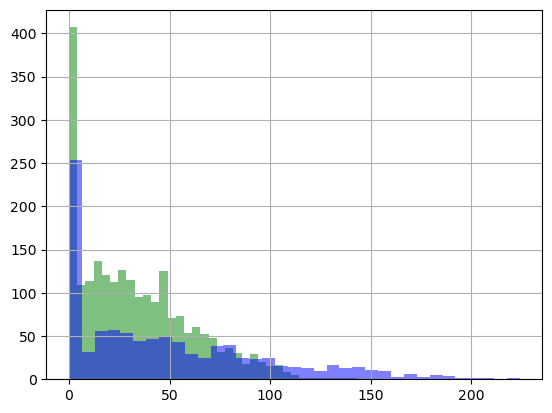

In [56]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

Пользователи тарифа Smart отправляют до 110 сообщений в мес, а на тарифе Ultra - до 200.

Общее количество отправленных сообщений пользователей "Ультра" не добирается и до четверти пакета - максимальное количество около 200 за месяц. Общее количество сообщений пользователей "Смарт" может даже в два раза превысить объем, включенный в пакет - максимальное количество около 110 сообщений в мес.

Распределение среднего количества потраченного трафика по видам тарифов и месяцам:

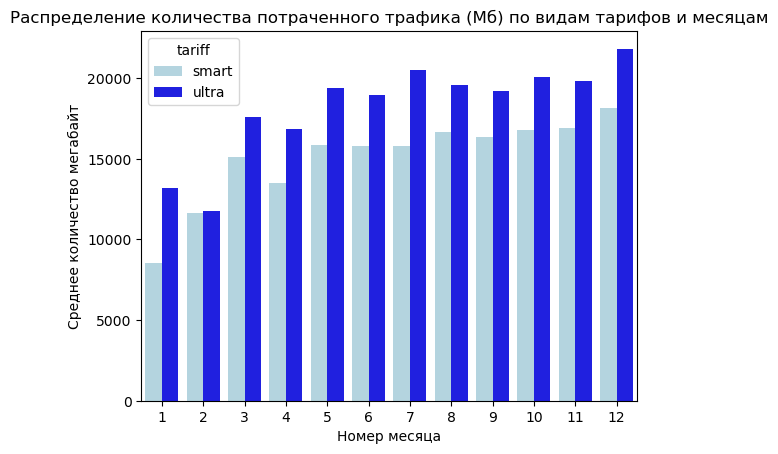

In [57]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra:

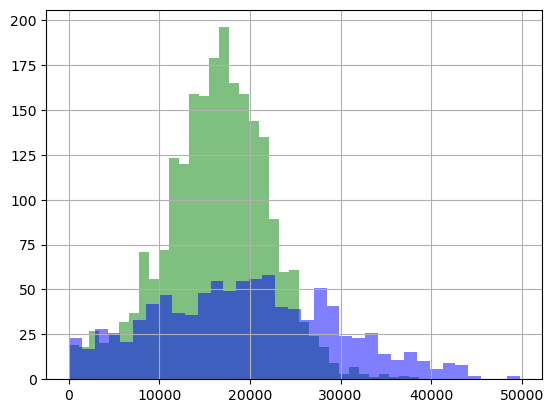

In [58]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

Объем использованного трафика пользователей "Ultra" примерно у 20% пользователей превышает пакет, максимальное достигает 48 Гб. Общее количество трафика пользователей "Смарт" может более чем в два раза превысить объем, включенный в пакет, максимальное достигает 38 Гб.

## Проверка гипотез

Проверка гипотезы: **средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [59]:
sample_1 = user_behavior[user_behavior['tariff']=='smart']['total_cost']
sample_2 = user_behavior[user_behavior['tariff']=='ultra']['total_cost']
results = st.ttest_ind(sample_1,sample_2,equal_var = False) #  вызов метода для проверки гипотезы

alpha = 0.05 #  задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:  # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.7240946993530856e-246
Отвергаем нулевую гипотезу


То есть средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Проверка гипотезы: **пользователи из Москвы приносят больше выручки, чем пользователи из других городов**

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [60]:
sample_1 = user_behavior[user_behavior['city']=='Москва']['total_cost']
sample_2 = user_behavior[user_behavior['city']!='Москва']['total_cost']
results = st.ttest_ind(sample_1,sample_2,equal_var = False) #  вызов метода для проверки гипотезы

alpha = 0.05 #  задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


То есть не подтвердилась гипотеза о том, что пользователи из Москвы приносят больше выручки, чем пользователи из других городов.

## Вывод

По небольшой выборке клиентов мобильного оператора "Мегалайн" был выполнен анализ двух тарифов на основании данных за 2018 год. В ходе анализа выявили следующее:

- мы изучили траты пользователей, их потраченные пакеты минут звонков, смс и интернета.  
  
В среднем потраченных минут на тарифе "Смарт" - 420, на тарифе "Ультра" - 528.
Отправленных смс на тарифе "Смарт" в среднем - 32, на тарифе "Ультра" - 54.  
Потраченного интернет-трафика на тарифе "Смарт" - в среднем 16 Гб, на тарифе "Ультра" - 19 Гб.  
Затраты на тарифе "Смарт" - среднее 1330, на тарифе "Ультра" - среднее 2087.  
  
Таким образом, большинство пользователей тарифа "Смарт" используют больше услуг, чем включено в базовые пакеты, и платят суммарно до двух раз больше, чем базовая абонентская плата. Но даже с учетом дополнительных затрат средний месячный платеж меньше, чем на тарифе "Ультра". 
Большинство пользователей тарифа "Ультра" платят только абонентскую плату и некоторые докупают пакет интернета.  
  
- Проверены гипотезы, в результате которых выявлено, что средняя выручка с пользователей тарифов "Смарт" и "Ультра" различается, а затраты пользователей из Москвы не отличаются статистически значимо от затрат пользователей из регионов.  
  
По итогу делаем вывод, что хоть тариф Смарт и более популярный (пользователей, подключившихся к нему, в выборке больше более чем в 2 раза), но среднемесячный доход с пользователя выше на тарифе "Ультра", поэтому он более перспективен для рекламных компаний.